In [1]:
#Package modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

import time
import math

#Custom modules
from digitclassifier import DigitClassifier, show_image

In [2]:
%load_ext autoreload
%autoreload 2

Using MNIST 784 which is small subset of MNIST dataset, containing 70,000 images with flattened image vector of 784x1 each having dimension as 128x128

In [3]:
_x, _y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [4]:
print(_y.view())

['5' '0' '4' ... '4' '5' '6']


In [5]:
x = _x[:1000,:] #Using a slice for initial setup
y = _y[:1000]   #Using a slice for initial setup

x = (x/255).astype('float32')
y = pd.Series(y, dtype="category").cat.codes.values

img_w = 28;
img_l = 28;

print("x.shape = {}".format(x.shape))
print("y.shape = {}".format(y.shape))
print("sample y = {}".format(y))
print("sample y as categorical var = {}".format(y))
print("image width = {}".format(img_w))
print("image length = {}".format(img_l))

assert img_l*img_w == x.shape[1]
input_row_size = x.shape[1]
print("Flattened image dimension same as input row = {}".format(input_row_size))

x.shape = (1000, 784)
y.shape = (1000,)
sample y = [5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6
 0 7 6 1 8 7 9 3 9 8 5 9 3 3 0 7 4 9 8 0 9 4 1 4 4 6 0 4 5 6 1 0 0 1 7 1 6
 3 0 2 1 1 7 9 0 2 6 7 8 3 9 0 4 6 7 4 6 8 0 7 8 3 1 5 7 1 7 1 1 6 3 0 2 9
 3 1 1 0 4 9 2 0 0 2 0 2 7 1 8 6 4 1 6 3 4 5 9 1 3 3 8 5 4 7 7 4 2 8 5 8 6
 7 3 4 6 1 9 9 6 0 3 7 2 8 2 9 4 4 6 4 9 7 0 9 2 9 5 1 5 9 1 2 3 2 3 5 9 1
 7 6 2 8 2 2 5 0 7 4 9 7 8 3 2 1 1 8 3 6 1 0 3 1 0 0 1 7 2 7 3 0 4 6 5 2 6
 4 7 1 8 9 9 3 0 7 1 0 2 0 3 5 4 6 5 8 6 3 7 5 8 0 9 1 0 3 1 2 2 3 3 6 4 7
 5 0 6 2 7 9 8 5 9 2 1 1 4 4 5 6 4 1 2 5 3 9 3 9 0 5 9 6 5 7 4 1 3 4 0 4 8
 0 4 3 6 8 7 6 0 9 7 5 7 2 1 1 6 8 9 4 1 5 2 2 9 0 3 9 6 7 2 0 3 5 4 3 6 5
 8 9 5 4 7 4 2 7 3 4 8 9 1 9 2 8 7 9 1 8 7 4 1 3 1 1 0 2 3 9 4 9 2 1 6 8 4
 7 7 4 4 9 2 5 7 2 4 4 2 1 9 7 2 8 7 6 9 2 2 3 8 1 6 5 1 1 0 2 6 4 5 8 3 1
 5 1 9 2 7 4 4 4 8 1 5 8 9 5 6 7 9 9 3 7 0 9 0 6 6 2 3 9 0 7 5 4 8 0 9 4 1
 2 8 7 1 2 6 1 0 3 0 1 1 8 2 0 3 9 4 0 5 0 6 1 7 

Visualizing image from MNIST dataset

<Figure size 432x288 with 0 Axes>

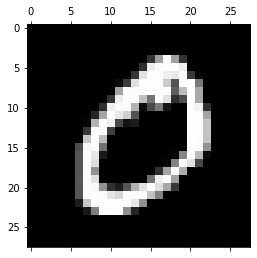

In [6]:
show_image(x[1], img_w, img_l)

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

Let's visualize train test data

<Figure size 432x288 with 0 Axes>

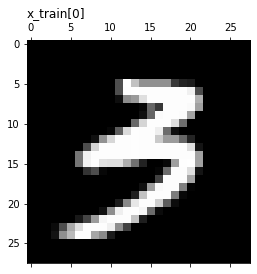

y_train[0] = 3
y_test[0] = 7


<Figure size 432x288 with 0 Axes>

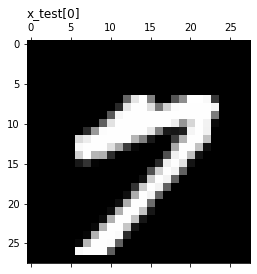

In [8]:
show_image(x_train[0], img_w, img_l, "x_train[0]")
print(f"y_train[0] = {y_train[0]}")
show_image(x_test[0], img_w, img_l, "x_test[0]")
print(f"y_test[0] = {y_test[0]}")

In [9]:
layer1_size = 128
layer2_size = 64
activation_layer_size = 10;

print("input_row_size = {}".format(input_row_size))
print("layer1_size = {}".format(layer1_size))
print("layer2_size = {}".format(layer2_size))
print("activation_layer_size = {}".format(activation_layer_size))

input_row_size = 784
layer1_size = 128
layer2_size = 64
activation_layer_size = 10


In [10]:
# %load digitclassifier.py

In [11]:
model = DigitClassifier(
    img_w=img_w,
    img_l=img_l,
    sizes=[input_row_size, layer1_size, layer2_size, activation_layer_size],
    epochs=10)
model.train(x_train, y_train, x_test, y_test)

Epoch: 1, Time Spent: 0.20s, Accuracy: 0.19
Epoch: 2, Time Spent: 0.41s, Accuracy: 0.19
Epoch: 3, Time Spent: 0.60s, Accuracy: 0.19
Epoch: 4, Time Spent: 0.81s, Accuracy: 0.19
Epoch: 5, Time Spent: 1.04s, Accuracy: 0.19
Epoch: 6, Time Spent: 1.26s, Accuracy: 0.19
Epoch: 7, Time Spent: 1.46s, Accuracy: 0.19
Epoch: 8, Time Spent: 1.67s, Accuracy: 0.19
Epoch: 9, Time Spent: 1.88s, Accuracy: 0.19
Epoch: 10, Time Spent: 2.09s, Accuracy: 0.19


### Results

The results are varying currently from 10%-30% depending on the variations in the parameters.



### Model Storage

Saving the model object for the inference pipeline

In [12]:
from joblib import dump
dump(model, 'model.joblib')

['model.joblib']